In [1]:
import librosa
import numpy as np
import pandas as pd
import torch
import os
import pickle
from pytorch_pretrained_vit import ViT

In [2]:
model_name = 'B_16_imagenet1k'
model = ViT(model_name, pretrained=True)

Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to /home/empathy/.cache/torch/hub/checkpoints/B_16_imagenet1k.pth


  0%|          | 0.00/331M [00:00<?, ?B/s]

Loaded pretrained weights.


In [4]:
with open('data/preprocessed_data_split_nona_03_07.pkl', 'rb') as f:
    train, val, test = pickle.load(f)

In [96]:
val.head()

,emotion,intensity,statement,repeat,gender,mel,mfcc,chromagram,spec_contrast,tonnetz,filename,mel_pad,mfcc_pad,chromagram_pad,spec_contrast_pad,tonnetz_pad
195,2,1,2,2,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-976.11755, -976.11755, -976.11755, -976.117...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[18.698652440717126, 18.698652440717126, 18.6...","[[-0.24351785481696392, -0.22269760507170488, ...",03-01-02-01-02-02-20.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-976.1175537109375, -976.1175537109375, -976...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[18.698652440717126, 18.698652440717126, 18.6...","[[-0.24351785481696392, -0.22269760507170488, ..."
1048,6,1,1,1,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-919.54193, -919.54193, -919.54193, -919.541...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[14.30063620727286, 14.30063620727286, 14.300...","[[0.011945099331460431, 0.02484843939140515, 0...",03-01-06-01-01-01-14.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-919.5419311523438, -919.5419311523438, -919...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[14.30063620727286, 14.30063620727286, 14.300...","[[0.011945099331460431, 0.02484843939140515, 0..."
532,7,1,2,1,0,"[[5.976571e-14, 3.2825318e-09, 4.7936957e-09, ...","[[-735.2311, -735.2311, -735.2311, -735.2311, ...","[[0.91999584, 0.9419208, 0.9717938, 1.0, 1.0, ...","[[27.160881999404914, 10.240644242524503, 17.3...","[[-0.039178584692475336, -0.07856553551372042,...",03-01-07-01-02-01-04.wav,"[[5.976570963388966e-14, 3.282531801929167e-09...","[[-735.2310791015625, -735.2310791015625, -735...","[[0.9199958443641663, 0.941920816898346, 0.971...","[[27.160881999404914, 10.240644242524503, 17.3...","[[-0.039178584692475336, -0.07856553551372042,..."
1273,5,1,2,1,0,"[[5.161722e-06, 1.9711595e-06, 1.4549606e-07, ...","[[-760.2454, -761.35565, -763.5334, -763.5334,...","[[0.7726974, 0.86186564, 0.8380048, 0.6996503,...","[[25.352601414654497, 17.07070284635677, 10.08...","[[-0.09442284617849674, -0.08483387511976943, ...",03-01-05-01-02-01-06.wav,"[[5.16172212883248e-06, 1.971159463209915e-06,...","[[-760.2454223632812, -761.3556518554688, -763...","[[0.772697389125824, 0.8618656396865845, 0.838...","[[25.352601414654497, 17.07070284635677, 10.08...","[[-0.09442284617849674, -0.08483387511976943, ..."
1064,4,2,2,1,0,"[[2.1212953e-11, 1.1371189e-10, 2.6217887e-13,...","[[-766.1009, -766.1009, -766.1009, -766.1009, ...","[[0.8027966, 0.9662601, 0.93856305, 0.934313, ...","[[20.23687827597825, 13.043456325271165, 21.71...","[[0.15901379770687685, 0.10643275780873687, 0....",03-01-04-02-02-01-14.wav,"[[2.1212953268956447e-11, 1.1371188712860913e-...","[[-766.1008911132812, -766.1008911132812, -766...","[[0.8027966022491455, 0.9662600755691528, 0.93...","[[20.23687827597825, 13.043456325271165, 21.71...","[[0.15901379770687685, 0.10643275780873687, 0...."


In [12]:
# 256 + 6 + 20 + 12 + 7 = 256 + 45 = 301
print(train['mel_pad'][0].shape)
print(train['tonnetz_pad'][0].shape)
print(train['mfcc_pad'][0].shape)
print(train['chromagram_pad'][0].shape)
print(train['spec_contrast_pad'][0].shape)
print(model.image_size)
print(len(train['mel_pad']))

(256, 250)
(6, 250)
(20, 250)
(12, 250)
(7, 250)
(384, 384)
1152


In [13]:
from torchvision import transforms

# implementing a mel-only version
class TransformerDataset(torch.utils.data.Dataset):
    
    def __init__(self, df):
        self.labels = df['emotion'].reset_index(drop=True)
        self.num_labels = self.labels.nunique()
        self.mels = df['mel_pad'].reset_index(drop=True)
        self.max_len = self.mels[0].shape[1]
        self.transform = transforms.Compose([transforms.ToTensor(), 
                                             transforms.CenterCrop((self.max_len, self.max_len)),
                                             transforms.Resize(model.image_size)])
                                             #transforms.Normalize([0.5, 0.5, 0.5],
                                                                  #[0.5, 0.5, 0.5]),])
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        mel = self.mels.iloc[idx]
        label = self.labels.iloc[idx]        
        mel = self.transform(mel)
        # stack the same mel spectrogram three times to emulate RGB image
        mel = torch.stack([mel]*3, dim=1).squeeze(dim=0).type(torch.float)
        label = torch.tensor(label-1).type(torch.long)
        
        return mel, label

In [14]:
train_dataset = TransformerDataset(train)
print(len(train_dataset))
print(train_dataset[0][0].shape)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

1152
torch.Size([3, 384, 384])


In [79]:
model.eval()
img = train_dataset[0]['mel']
with torch.no_grad():
    outputs = model(img.float()).squeeze(0)

torch.float64


In [80]:
print(outputs)

tensor([ 2.9006e-01, -4.4152e-01,  1.0690e+00,  8.5133e-01,  4.7515e-01,
         1.4316e+00,  6.7732e-01,  1.2937e+00,  1.3502e+00,  4.2589e-01,
        -2.1948e-02,  1.8287e-02,  5.3393e-01,  6.2777e-01,  4.0235e-01,
         3.8769e-01,  3.0730e-01,  7.2035e-02,  5.7832e-01,  5.7177e-03,
         1.4967e-01,  1.1717e+00, -3.1195e-01,  1.0661e+00,  1.1295e+00,
         1.1733e-01,  6.9069e-01,  8.8820e-01,  5.2121e-02,  4.0993e-01,
         4.1394e-01, -5.7875e-02,  7.2773e-01,  8.5857e-01,  1.4262e+00,
         9.1457e-01,  8.6527e-01,  2.7526e-01,  9.3126e-01,  5.0425e-01,
         1.1983e-01,  4.9441e-01,  4.8497e-01,  1.0178e+00,  2.4681e-01,
         6.2170e-01,  4.5660e-01,  1.0780e+00,  1.7463e-01,  7.5374e-02,
        -4.0800e-02,  4.5961e-01,  5.2406e-01,  3.2302e-01,  7.8556e-01,
         2.9601e-01,  7.1838e-01, -3.1687e-01,  9.8314e-02,  2.9557e-01,
         1.4868e+00,  8.4138e-01,  5.2131e-01, -2.9590e-01,  4.3673e-01,
        -2.6020e-01,  8.6630e-01,  3.8989e-01,  9.0

## START BUILDING CLASSIFICATION MODEL ON TOP

In [7]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [8]:
model_ft = ViT(model_name, pretrained=True)
set_parameter_requires_grad(model_ft, feature_extracting=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, train_dataset.num_labels)
input_size = 384

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

Loaded pretrained weights.


In [25]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
print("Params to learn:")
params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)


# Try the original transformer's optimizer
optimizer_ft = torch.optim.AdamW(params_to_update, lr=1e-9, betas=(.9, .98))

Params to learn:
	 fc.weight
	 fc.bias


In [22]:
import time 
import copy

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [26]:
criterion = torch.nn.CrossEntropyLoss()
train_dataset = TransformerDataset(train)
val_dataset = TransformerDataset(val)
test_dataset = TransformerDataset(test)
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_dataset), 
                    'val': torch.utils.data.DataLoader(val_dataset), 
                    'test': torch.utils.data.DataLoader(test_dataset)}
# Train and evaluate
num_epochs = 15
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/14
----------
train Loss: 1.2343 Acc: 0.5564
val Loss: 2.0127 Acc: 0.4306

Epoch 1/14
----------
train Loss: 1.3610 Acc: 0.5616
val Loss: 2.0127 Acc: 0.4306

Epoch 2/14
----------
train Loss: 1.2989 Acc: 0.5642
val Loss: 2.0127 Acc: 0.4306

Epoch 3/14
----------
train Loss: 1.3077 Acc: 0.5469
val Loss: 2.0127 Acc: 0.4306

Epoch 4/14
----------
train Loss: 1.2592 Acc: 0.5712
val Loss: 2.0127 Acc: 0.4306

Epoch 5/14
----------
train Loss: 1.2641 Acc: 0.5668
val Loss: 2.0127 Acc: 0.4306

Epoch 6/14
----------
train Loss: 1.2466 Acc: 0.5642
val Loss: 2.0127 Acc: 0.4306

Epoch 7/14
----------
train Loss: 1.3498 Acc: 0.5582
val Loss: 2.0127 Acc: 0.4306

Epoch 8/14
----------
train Loss: 1.2547 Acc: 0.5729
val Loss: 2.0127 Acc: 0.4306

Epoch 9/14
----------
train Loss: 1.3134 Acc: 0.5443
val Loss: 2.0127 Acc: 0.4306

Epoch 10/14
----------
train Loss: 1.3422 Acc: 0.5486
val Loss: 2.0127 Acc: 0.4306

Epoch 11/14
----------
train Loss: 1.3162 Acc: 0.5469
val Loss: 2.0127 Acc: 0.4306

Ep

In [27]:
torch.save(model_ft, "visual_transformer_mel_cropped_stacked_freeze_layers_lr1e-9_Adam.pt")

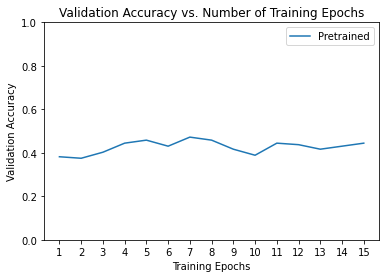

In [19]:
import matplotlib.pyplot as plt

ohist = [h.cpu().numpy() for h in hist]
plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()